In [1]:
import numpy as np
import tensorflow as tf
import random

SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

import d2d
import importlib
importlib.reload(d2d)
import pandas as pd
import os

In [2]:
file = "/data/fast0/datasets/Rhone_data_continuous_highpass.h5"

filt = 'Highpass'

SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)



linear_model, lstm_model, dnn_model, df_all_chan, das_data_all, f  = d2d.import_data(filename = file)

Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>


In [7]:
all_das = das_data_all[:,0:2308]

In [228]:
all_das.shape

(62745, 2308)

In [9]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


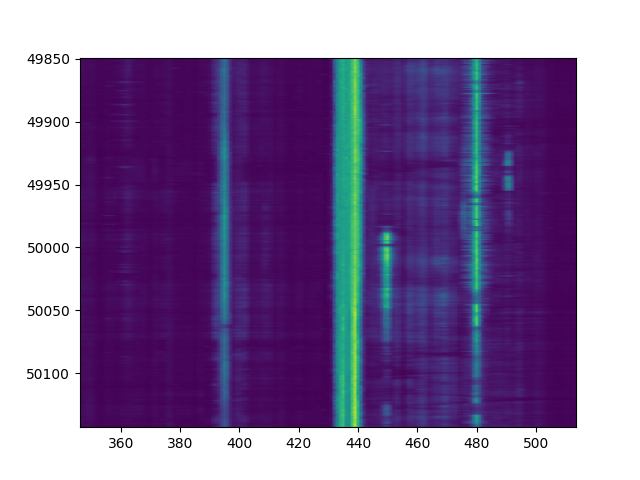

In [227]:
fig, ax = plt.subplots()
ax.imshow(all_das, aspect = 'auto')

In [119]:
x = np.arange(0, 600, 1)
frequency = [100, 200, 300, 400, 500]
max_freq = 500
min_freq = 100
A_river = 9000e-9 * 10 # RMS strain rate * gauge length = velocity
A_min_impulse = 2e-12 * 1000 *10 # 2 picostrain rsesolation
c = 0 #spreading factor, probably not negligible

<IPython.core.display.Javascript object>


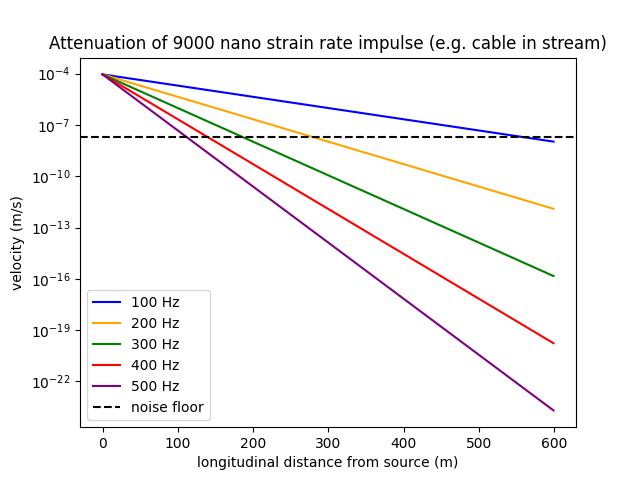

In [120]:
fig, ax = plt.subplots()
color = ['b', 'orange', 'g', 'r', 'purple']
#attenuation in ice
for f,col in zip(frequency, color):
    A_response = A_river * np.exp(-x * ((np.pi * f)/ (6 * 3466)) + c)
    A_resolvable = A_min_impulse / np.exp(-x * ((np.pi * f)/ (6 * 3466)) + c)
    ax.plot(A_response, label = str(f)+' Hz', c = col)
    #ax.plot(A_resolvable, linestyle = '--', c = col)
ax.axhline(y=A_min_impulse, c = 'black', linestyle = '--', label='noise floor')    
ax.legend()
ax.set_yscale('log')
ax.set_ylabel('velocity (m/s)')
ax.set_xlabel('longitudinal distance from source (m)')
ax.set_title('Attenuation of 9000 nano strain rate impulse (e.g. cable in stream)')
plt.show()

In [151]:
## horizontal distance we are sensitive to ##
y = np.arange(0, 300, 1)
frequency = [100, 200, 300, 400, 500]

#impulse_amplitude = A_min_impulse / np.exp(-np.sqrt(A_min_impulse**2 + y**2) * ((np.pi * f)/ (6 * 3466)) + c)

<IPython.core.display.Javascript object>


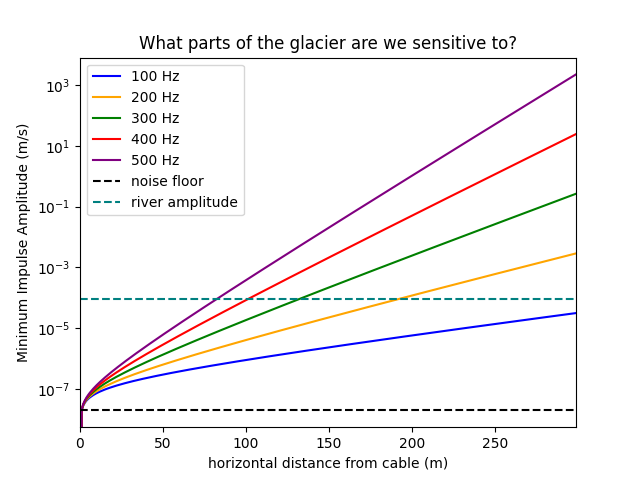

In [152]:
fig, ax = plt.subplots()
color = ['b', 'orange', 'g', 'r', 'purple']

for f,col in zip(frequency, color):
    impulse_amplitude = (A_min_impulse * np.sqrt(y)) / np.exp(-y * ((np.pi * f)/ (6 * 3466)) + c)
    ax.plot(impulse_amplitude, label = str(f)+' Hz', c = col)
    
ax.axhline(y=A_min_impulse, c = 'black', linestyle = '--', label='noise floor')        
ax.axhline(y=A_river, c = 'teal', linestyle = '--', label='river amplitude') 
ax.legend()
ax.set_yscale('log')
ax.set_xlim([y[0],y[-1]])
ax.set_ylabel('Minimum Impulse Amplitude (m/s)')
ax.set_xlabel('horizontal distance from cable (m)')
ax.set_title('What parts of the glacier are we sensitive to?')
plt.show()

In [212]:
y = np.arange(1, 1000, 1)
x = np.arange(1, 1000, 1)

factor = (100 * np.pi) / (6 * 4000)

Amplitude = (np.exp(-y*factor)) * (1 / np.sqrt(y))

<IPython.core.display.Javascript object>


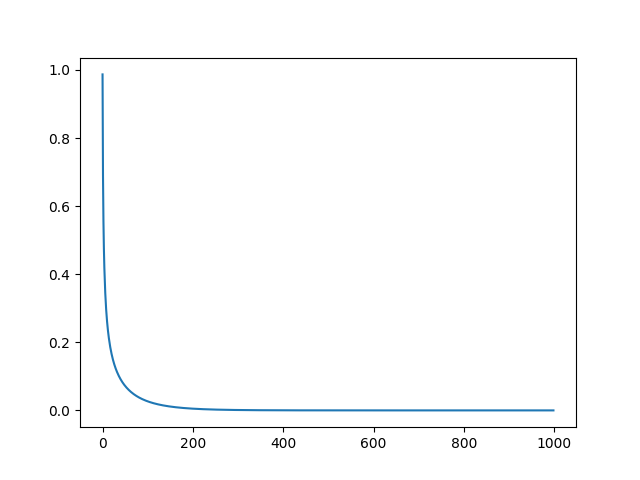

In [213]:
fig, ax = plt.subplots()

plt.plot(Amplitude)

In [215]:
np.sum(Amplitude)

14.034293062449121

In [216]:
big_x, big_y = np.meshgrid(x,y)

In [217]:
amplitude_xy = (np.exp(-np.sqrt(big_x**2 + big_y**2)*factor)) * (big_y / ((big_x**2 + big_y**2)**(3/4)))

In [218]:
amp_over_x = np.sum(amplitude_xy, axis = 0)

<IPython.core.display.Javascript object>


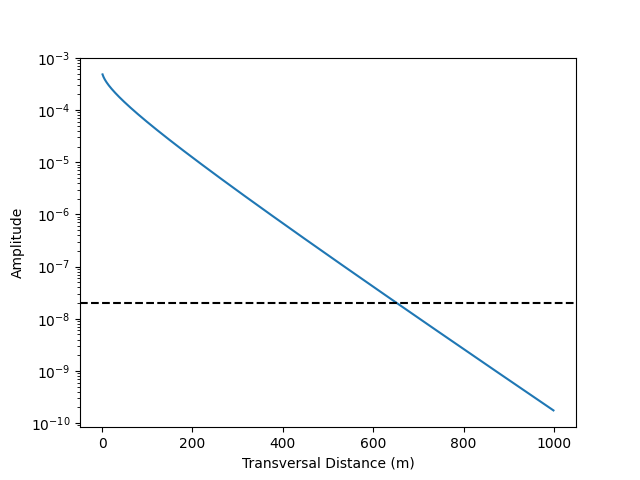

Text(0, 0.5, 'Amplitude')

In [219]:
fig, ax = plt.subplots()

ax.plot(x,amp_over_x * (A_river / 2.5))
ax.axhline(y=A_min_impulse, c = 'black', linestyle = '--', label='noise floor')   
plt.yscale('log')
plt.xlabel('Transversal Distance (m)')
plt.ylabel('Amplitude')

<IPython.core.display.Javascript object>


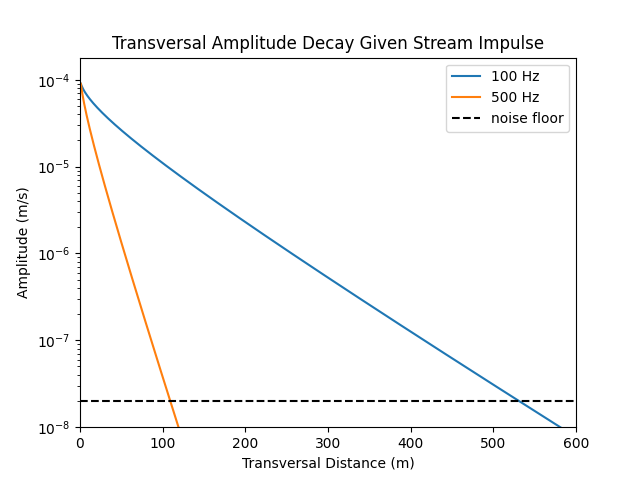

Text(0, 0.5, 'Amplitude (m/s)')

In [224]:
fig, ax = plt.subplots()

frequency = [100, 500]

for freq in frequency:
    factor = (freq * np.pi) / (6 * 4000)
    amplitude_xy = (np.exp(-np.sqrt(big_x**2 + big_y**2)*factor)) * (big_y / ((big_x**2 + big_y**2)**(3/4)))
    amp_over_x = np.sum(amplitude_xy, axis = 0)
    ax.plot(x,amp_over_x * (A_river / amp_over_x[0]), label = str(freq)+' Hz')
    
ax.axhline(y=A_min_impulse, c = 'black', linestyle = '--', label='noise floor')   
plt.legend()
plt.yscale('log')
plt.xlim([0,600])
plt.ylim([A_min_impulse/2, A_river*2])
plt.title('Transversal Amplitude Decay Given Stream Impulse')
plt.xlabel('Transversal Distance (m)')
plt.ylabel('Amplitude (m/s)')

<IPython.core.display.Javascript object>


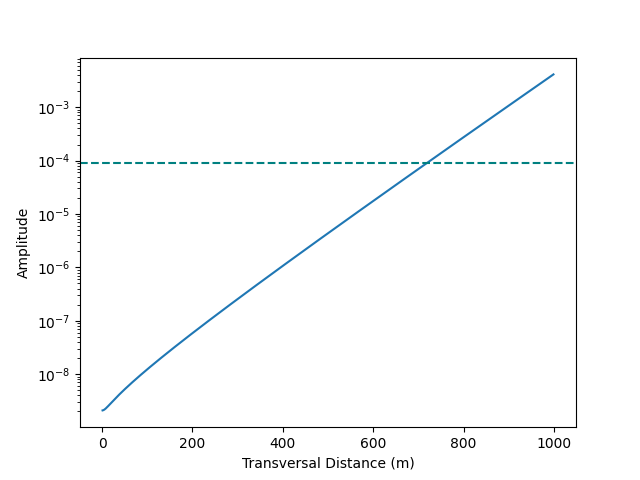

Text(0, 0.5, 'Amplitude')

In [157]:
fig, ax = plt.subplots()

ax.plot(x,1/amp_over_x * A_min_impulse)
ax.axhline(y=A_river, c = 'black', linestyle = '--', label='river amplitude') 
plt.yscale('log')
plt.xlabel('Transversal Distance (m)')
plt.ylabel('Amplitude')